# **k-Means Clustering**

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-
means clustering, which is implemented in sklearn.cluster.KMeans .

We begin with the standard imports:

# **Importing libraries**

In [13]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/content/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# **Introducing k-Means**

The k-means algorithm searches for a predetermined number of clusters within an unlabeled multidimensional dataset. It accomplishes this
using a simple conception of what the optimal clustering looks like:    

  1.The cluster center is the arithmetic mean of all the points belonging to the cluster.             
  2.Each point is closer to its own cluster center than to other cluster centers.         
Those two assumptions are the basis of the k-means model.   
First, let's generate a two-dimensional dataset containing four distinct blobs.

 To emphasize that this is an unsupervised algorithm, we will leave
the labels out of the visualization (see the following figure):    

In [9]:
# Display a brief description of the overall dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [19]:
df.drop(['country'], axis=1, inplace=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13
...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67


# **Initializing KMean**

In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)
kmeans.cluster_centers_.shape
kmeans

KMeans(n_clusters=2, random_state=42)

# **Finding Accuracy**

In [21]:
y_pred = kmeans.predict(df)
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = y_pred[mask]
acc = accuracy_score(y_pred, labels)
print("Acurracy : ",acc*100,"%")

Acurracy :  100.0 %


# **Show the best number in graph**

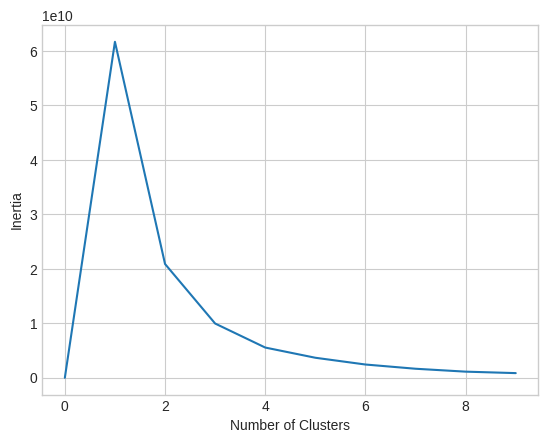

In [22]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# **k-Means for Color Compression**

One interesting application of clustering is in color compression within images (this example is adapted from Scikit-Learn's "Color Quantization Using K-Means"). For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.       
For example, consider the image shown in the following figure, which is from the Scikit-Learn datasets module (for this to work, you'll have to have the PIL Python package installed): (For a color version of this and following images, see the online version of this book).

# **Importing Libraries**

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [24]:
image = plt.imread("/content/image.jpg")

In [25]:
image.shape

(1080, 1920, 3)

In [26]:
data = image / 255.0 # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(2073600, 3)

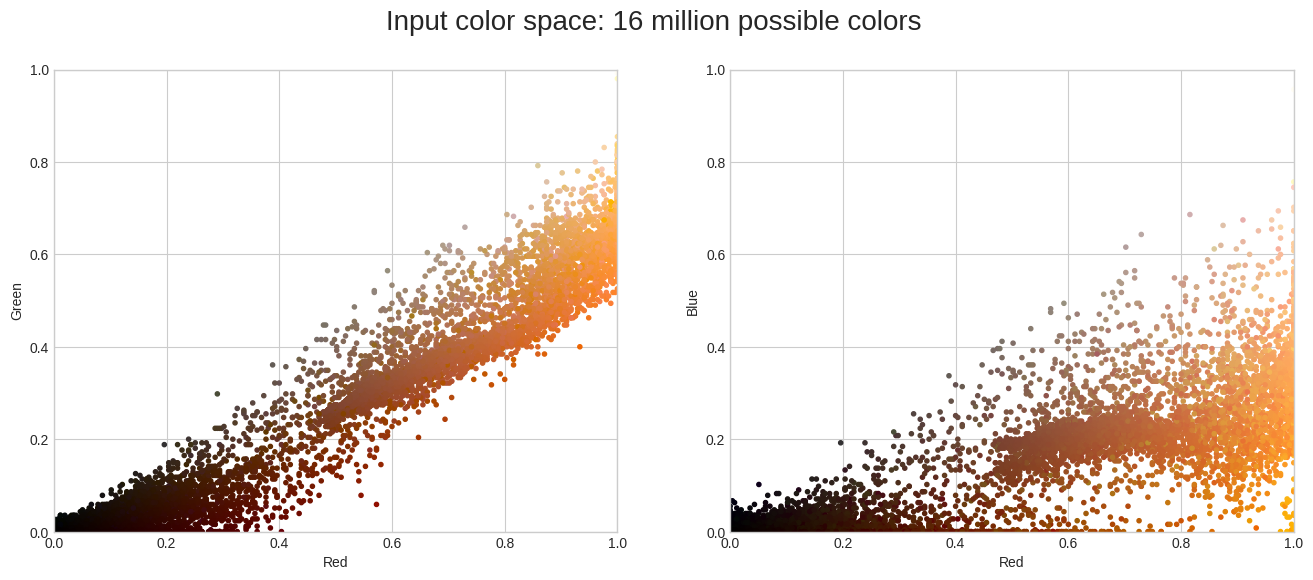

In [27]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data
  # choose a random subset
  rng = np.random.default_rng(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
  fig.suptitle(title, size=20);
plot_pixels(data, title='Input color space: 16 million possible colors')

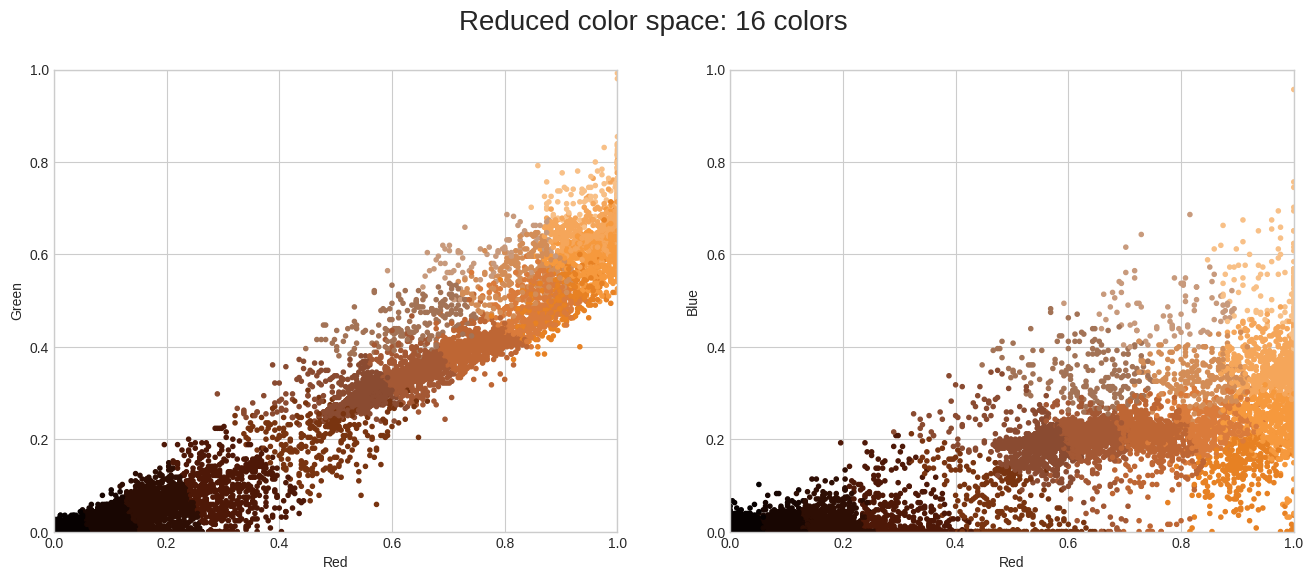

In [28]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
title="Reduced color space: 16 colors")

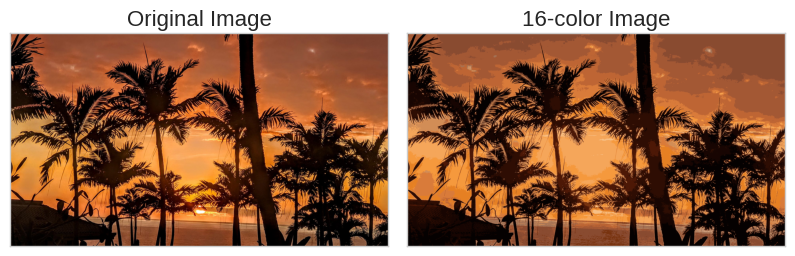

In [29]:
image_recolored = new_colors.reshape(image.shape)
fig, ax = plt.subplots(1, 2, figsize=(10,10),
subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16);